In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('fire_nrt_V1_96617.csv')
lon = df['longitude']
lat = df['latitude']
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


## Task 1

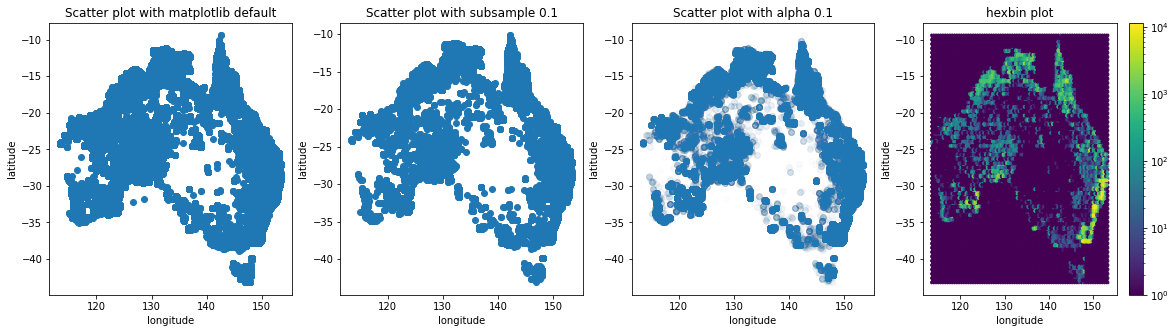

In [29]:
# Full data
lon = df['longitude']
lat = df['latitude']

# Sample data
num_samples = np.floor(0.1 * len(lon))
index = np.random.choice(np.arange(len(lon)),int(num_samples))
lon_sample = lon[index]
lat_sample = lat[index]

fig,axes = plt.subplots(1,4, figsize=(20,5))

axes[0].set_xlabel('longitude')
axes[0].set_ylabel('latitude')
axes[0].set_title('Scatter plot with matplotlib default')
axes[0].plot(lon,lat,'o')

axes[1].set_xlabel('longitude')
axes[1].set_ylabel('latitude')
axes[1].set_title('Scatter plot with subsample 0.1')
axes[1].plot(lon_sample,lat_sample,'o')

axes[2].set_xlabel('longitude')
axes[2].set_ylabel('latitude')
axes[2].set_title('Scatter plot with alpha 0.1')
axes[2].scatter(lon,lat,alpha = .01)

axes[3].set_xlabel('longitude')
axes[3].set_ylabel('latitude')
axes[3].set_title('hexbin plot')
img = axes[3].hexbin(lon,lat,bins='log')

fig.colorbar(img)

- We can see from the hexbin plot that, the border region has more anomaly whereas central region are fine.

- From scatter plot with alpha = 0.1 we can further see that anomalies are spread out across the borders. 



## Task 2

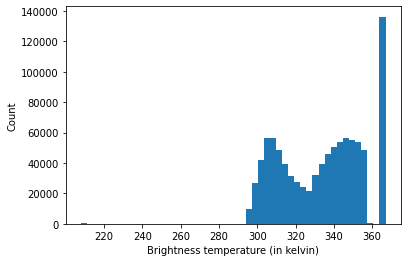

In [30]:
temp_i4 = df['bright_ti4']

plt.hist(temp_i4,bins=50)
plt.xlabel('Brightness temperature (in kelvin)')
plt.ylabel('Count')
plt.show()

In [37]:
#after 360 kelvin, the temperature value is saturated
temp = temp_i4[df['bright_ti4'] >= 360]
unique_temp_i4 = temp.unique()[0]
print(unique_temp_i4)

367.0


In [55]:
temp_i4_saturated = temp_i4[df['bright_ti4'] == unique_temp_i4]
temp_i4_notsaturated = temp_i4[df['bright_ti4'] != unique_temp_i4]

location_saturated = df['bright_ti4'].isin(temp_i4_saturated)
location_notsaturated = df['bright_ti4'].isin(temp_i4_notsaturated)

df_saturated = df.loc[location_saturated]
df_notsaturated = df.loc[location_notsaturated]

lon_saturated = df_saturated['longitude']
lat_saturated = df_saturated['latitude']

lon_notsaturated = df_notsaturated['longitude']
lat_notsaturated = df_notsaturated['latitude']


Text(0.5, 1.0, 'Longitude vs latitude with non saturated plots')

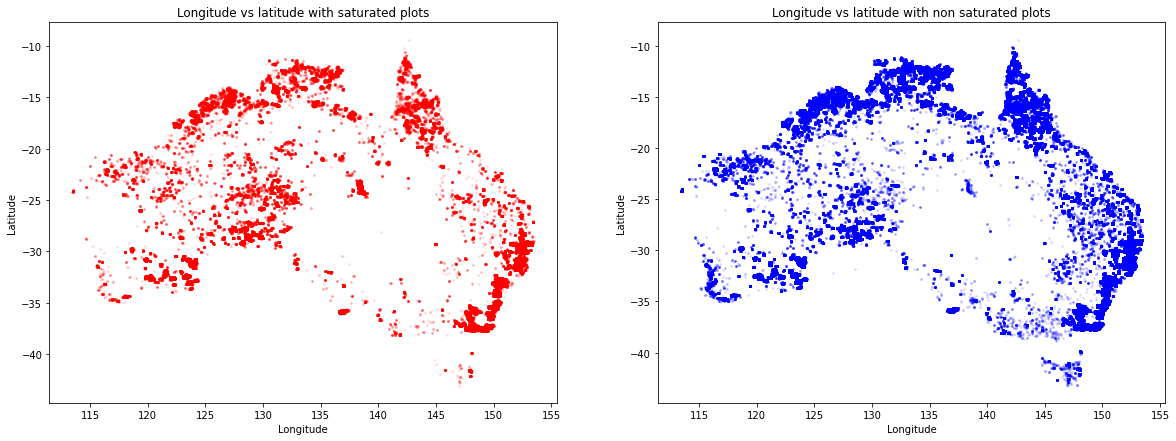

In [69]:
fig,ax = plt.subplots(1,2,figsize = (20,7))

ax[0].scatter(lon_saturated,lat_saturated,s = 3,alpha = 0.1, color = 'red')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Longitude vs latitude with saturated plots')

ax[1].scatter(lon_notsaturated,lat_notsaturated,s = 3, alpha = 0.1, color = 'blue')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Longitude vs latitude with non saturated plots')

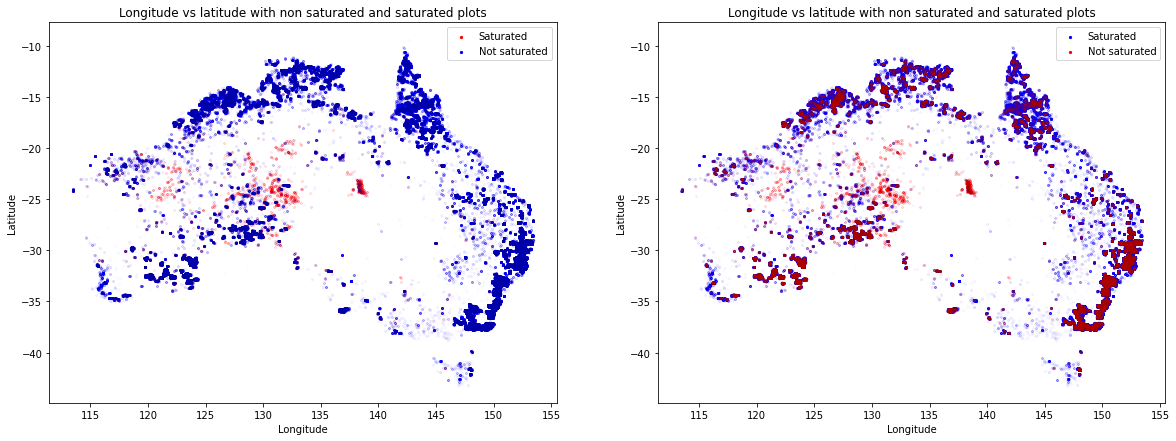

In [70]:
fix,ax = plt.subplots(1,2,figsize=(20,7))
ax[0].scatter(lon_saturated,lat_saturated,s=5,alpha = 0.01,color="red",label = "Saturated")
ax[0].scatter(lon_notsaturated,lat_notsaturated,s = 5, alpha = 0.01,color = "blue", label = "Not saturated")
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Longitude vs latitude with non saturated and saturated plots')
leg = ax[0].legend()

for lh in leg.legendHandles:
   lh.set_alpha(1)


ax[1].scatter(lon_notsaturated,lat_notsaturated,s=5,alpha = 0.01,color="blue",label = "Saturated")
ax[1].scatter(lon_saturated,lat_saturated,s = 5, alpha = 0.01,color = "red", label = "Not saturated")
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Longitude vs latitude with non saturated and saturated plots')
leg = ax[1].legend()

for lh in leg.legendHandles:
   lh.set_alpha(1)